# Correction protocol v2

In [3]:
import pyqsp
from pyqsp.gadgets import *
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

X = np.array([
    [0, 1],
    [1, 0]
])

In [67]:
# Creates and extraction gadget
deg = 12
G_ext = ExtractionGadget(deg, "G_ext")

In [68]:
#G_ext_int = G.interlink(G_ext, [(("G", 0), ("G_ext", 0), None)])

In [70]:
U = G_ext.get_qsp_unitary(('G_ext', 0), rot={('G_ext', 0) : 2.5}) # Gets the corresponding QSP unitary

In [72]:
# Demonstrates that the extraction protocol has succeeded
P = lambda x : U({('G_ext', 0): x}) # QSP polynomial

In [73]:
1j * X @ P(0.1) @ (Rz(2.5) @ Rz(2.5))

array([[ 1.00000000e+00-3.11972670e-14j,  4.67029556e-08+4.50193352e-08j],
       [-4.67029556e-08+4.50193352e-08j,  1.00000000e+00+3.10862447e-14j]])

In [74]:
def func(phi, theta):
    U = G_ext.get_qsp_unitary(('G_ext', 0), rot={('G_ext', 0) : theta})
    P = lambda x : U({('G_ext', 0): x}) # QSP polynomial
    return np.linalg.norm((1j * X @ P(phi) @ (Rz(theta) @ Rz(theta)) - np.eye(2)))

In [75]:
from matplotlib import pyplot as plt

Phi = np.linspace(-1, 1, 50)
Theta = np.linspace(-np.pi, np.pi, 50)

Y = [[func(p, q) for q in Theta] for p in tqdm(Phi)]

  0%|          | 0/50 [00:00<?, ?it/s]

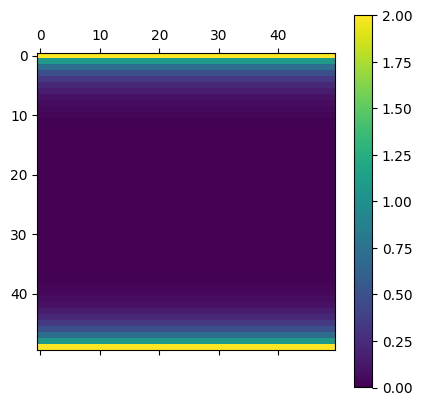

In [76]:
plt.matshow(Y)
plt.colorbar()